In [1]:
from utils import *
from nearest_neighbor import *
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
pd.set_option('max_columns', None)
from HAC_clustering import *

In [2]:
# path_data = "/Users/lou/Thesis/BCR_Clone_Identification/Data/"
# path_data = "/Users/lou/Box/Human Lymph Node/"
path_data = "/home/siyuan/thesis/Data/"

In [3]:
samples = ["sample%s"%n for n in [76,77,78,79,82,83,86,87,88,89,90,91,92,93,94,95,96,97,99]]

## Check the distribution

### 1. alignment-based

####  1) distance calculated for sequences of the same length

In [4]:
d_to_nearest_all1 = np.load(path_data+"d_to_nearest_sample76-99_a-based.npy")
dis1 = np.load(path_data+"dis_sample76-99_a-based.npy")

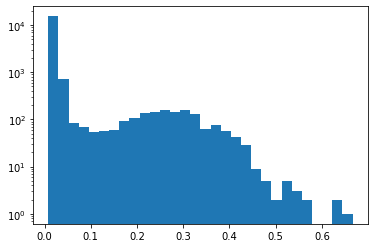

In [6]:
plt.hist(d_to_nearest_all1,bins=30)
plt.yscale("log")

#### 2) distance calculated for sequences of the same length and the same V, J annotation

In [7]:
d_to_nearest_all2 = np.load(path_data+"d_to_nearest_sample76-99_a-based_VJ.npy")
dis2 = np.load(path_data+"dis_sample76-99_a-based_VJ.npy")

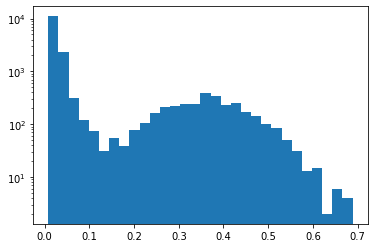

In [8]:
plt.hist(d_to_nearest_all2,bins=30)
plt.yscale("log")

#### 3) length-specific distribution

In [22]:
outfile = path_data+"sample76-99_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
print("All sequence:",df.shape)
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
print("Unique junction sequence:",df_unique.shape)

All sequence: (515605, 7)
Unique junction sequence: (17793, 7)


<AxesSubplot:>

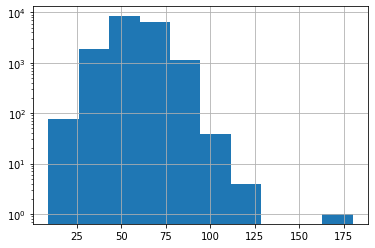

In [24]:
df_unique["JUNCTION length"].hist(log=True)

==== For JUNCTION length 63 ====
2040 sequences, 4159560 calls, use 15.125157 seconds.
Length of the distance to nearest neighbor list:  2040


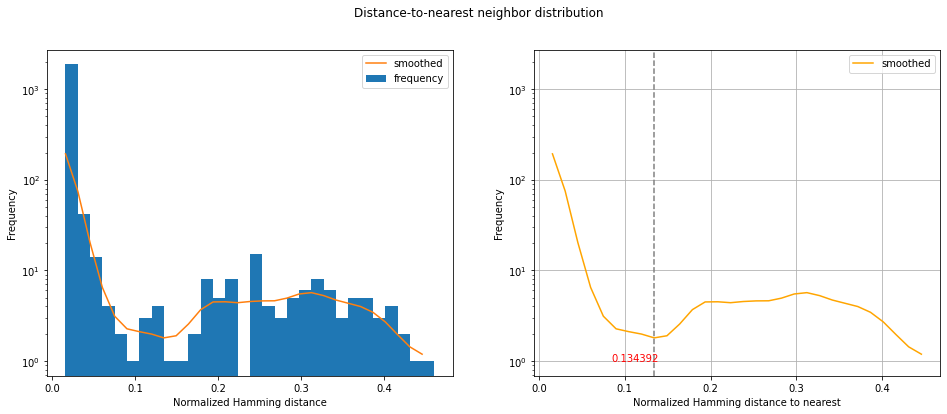

Cutoff value: 0.134392
==== For JUNCTION length 54 ====
1962 sequences, 3847482 calls, use 12.419465 seconds.
Length of the distance to nearest neighbor list:  1962


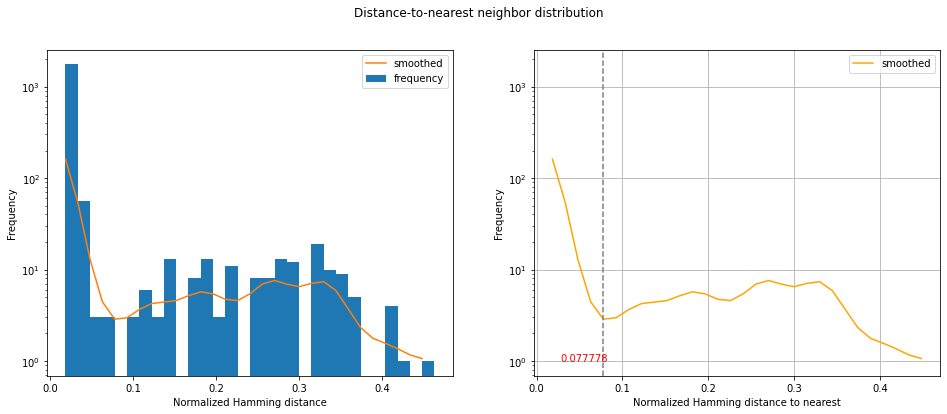

Cutoff value: 0.077778
==== For JUNCTION length 45 ====
1639 sequences, 2684682 calls, use 7.545495 seconds.
Length of the distance to nearest neighbor list:  1639


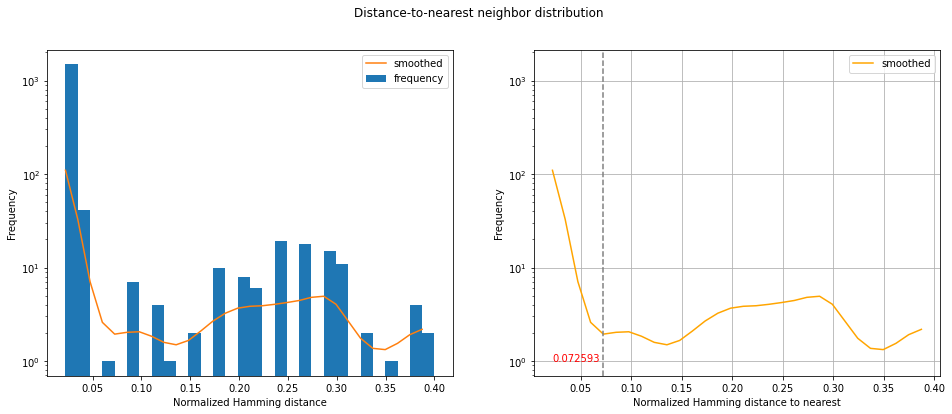

Cutoff value: 0.072593
==== For JUNCTION length 66 ====
1608 sequences, 2584056 calls, use 10.002985 seconds.
Length of the distance to nearest neighbor list:  1608


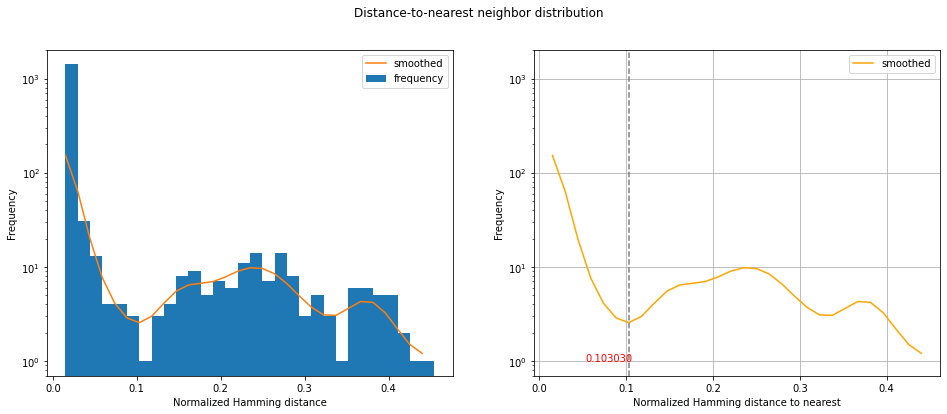

Cutoff value: 0.103030
==== For JUNCTION length 57 ====
1397 sequences, 1950212 calls, use 6.666934 seconds.
Length of the distance to nearest neighbor list:  1397


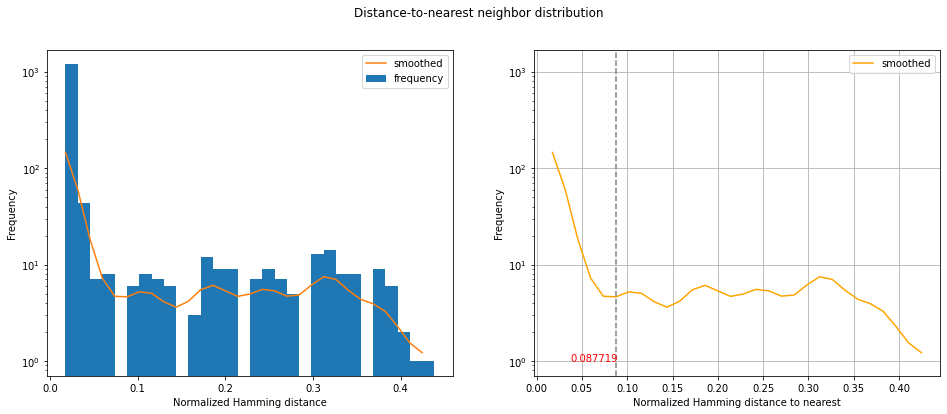

Cutoff value: 0.087719
==== For JUNCTION length 60 ====
1247 sequences, 1553762 calls, use 5.712076 seconds.
Length of the distance to nearest neighbor list:  1247


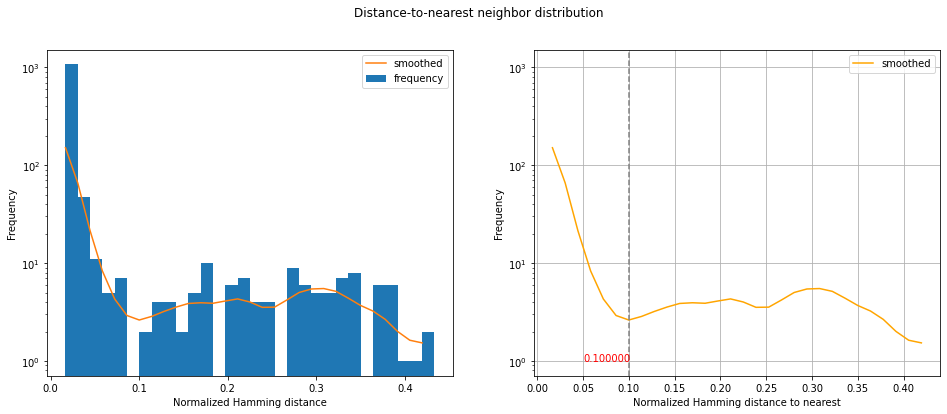

Cutoff value: 0.100000
==== For JUNCTION length 72 ====
1238 sequences, 1531406 calls, use 6.290075 seconds.
Length of the distance to nearest neighbor list:  1238


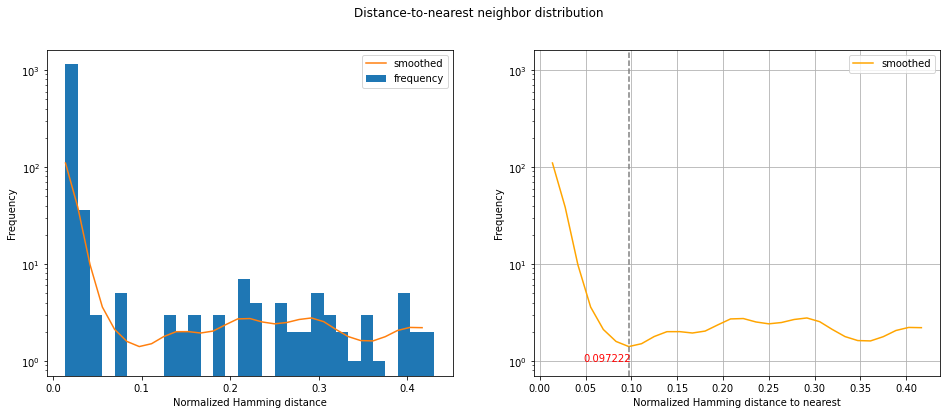

Cutoff value: 0.097222
==== For JUNCTION length 51 ====
1164 sequences, 1353732 calls, use 4.245417 seconds.
Length of the distance to nearest neighbor list:  1164


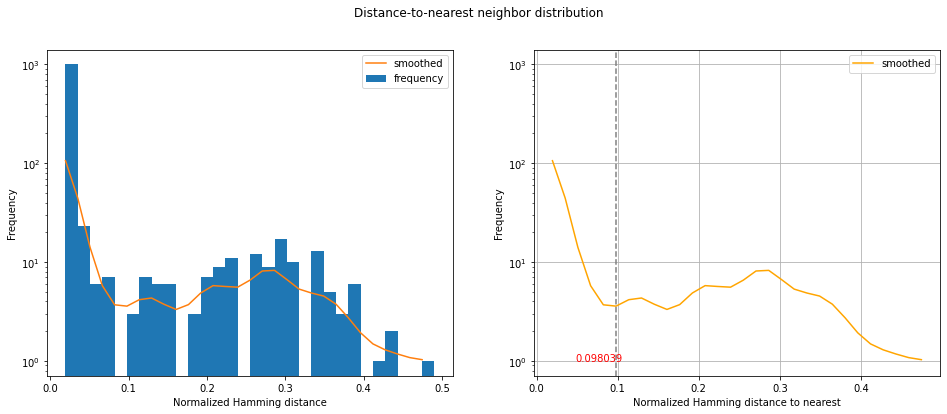

Cutoff value: 0.098039
==== For JUNCTION length 48 ====
969 sequences, 937992 calls, use 2.750823 seconds.
Length of the distance to nearest neighbor list:  969


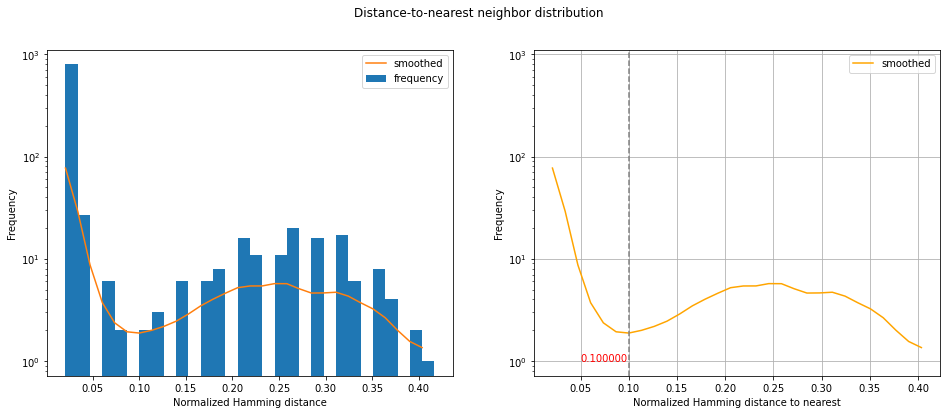

Cutoff value: 0.100000
==== For JUNCTION length 75 ====
928 sequences, 860256 calls, use 3.577233 seconds.
Length of the distance to nearest neighbor list:  928


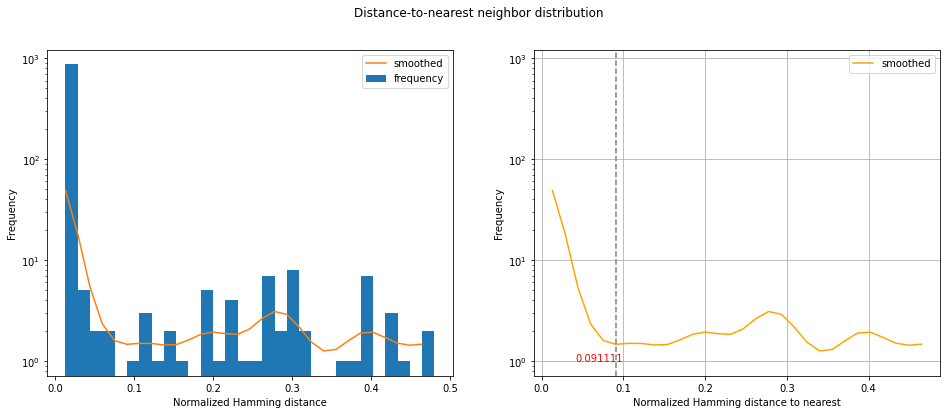

Cutoff value: 0.091111
==== For JUNCTION length 42 ====
708 sequences, 500556 calls, use 1.303800 seconds.
Length of the distance to nearest neighbor list:  708


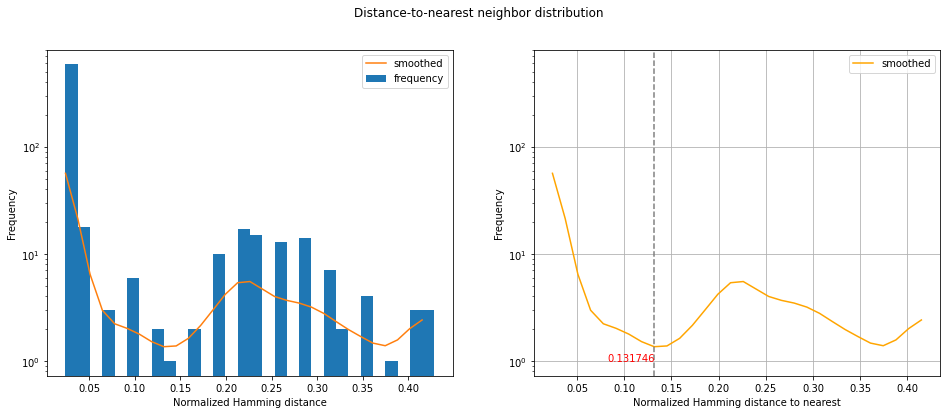

Cutoff value: 0.131746
==== For JUNCTION length 78 ====
587 sequences, 343982 calls, use 1.496948 seconds.
Length of the distance to nearest neighbor list:  587


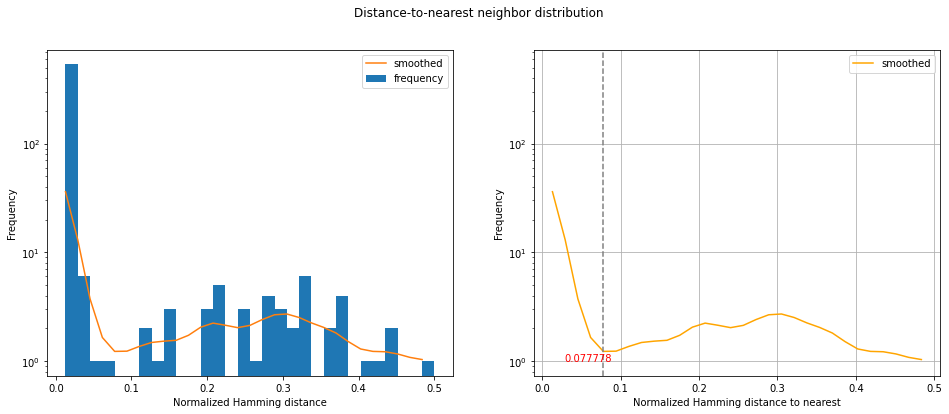

Cutoff value: 0.077778
==== For JUNCTION length 36 ====
523 sequences, 273006 calls, use 0.645774 seconds.
Length of the distance to nearest neighbor list:  523


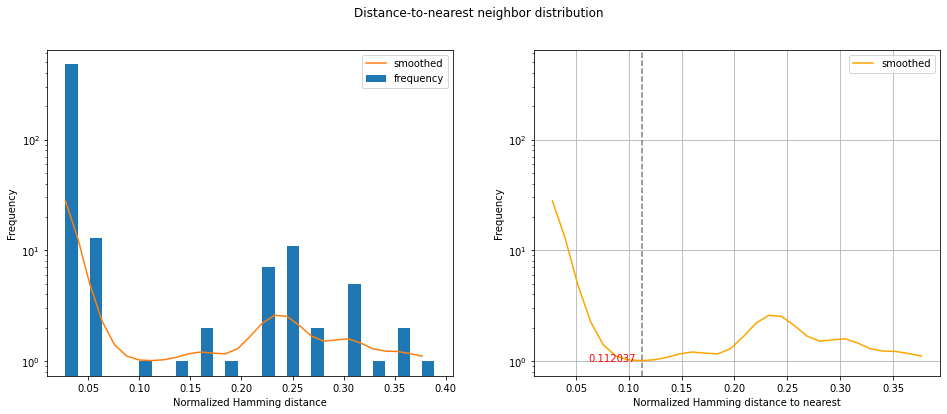

Cutoff value: 0.112037
==== For JUNCTION length 69 ====
496 sequences, 245520 calls, use 0.968007 seconds.
Length of the distance to nearest neighbor list:  496


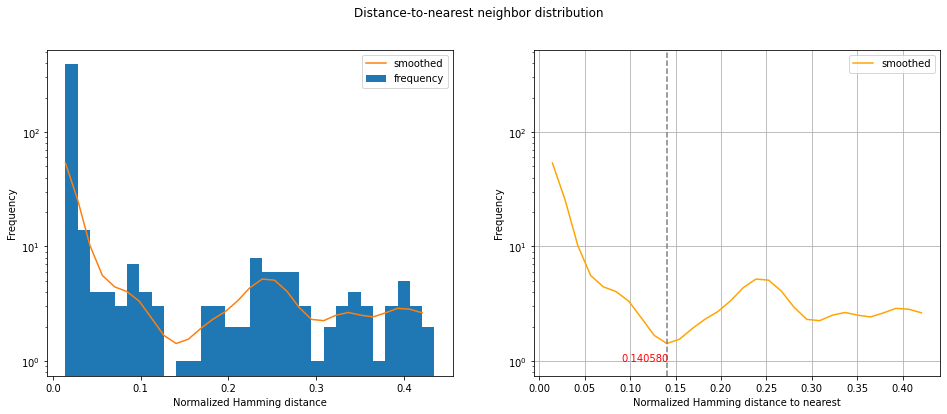

Cutoff value: 0.140580
==== For JUNCTION length 39 ====
323 sequences, 104006 calls, use 0.263810 seconds.
Length of the distance to nearest neighbor list:  323


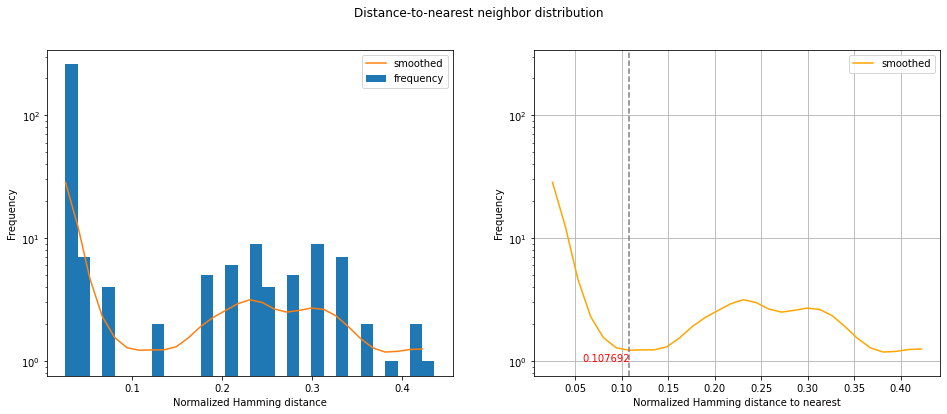

Cutoff value: 0.107692
==== For JUNCTION length 84 ====
253 sequences, 63756 calls, use 0.296046 seconds.
Length of the distance to nearest neighbor list:  253


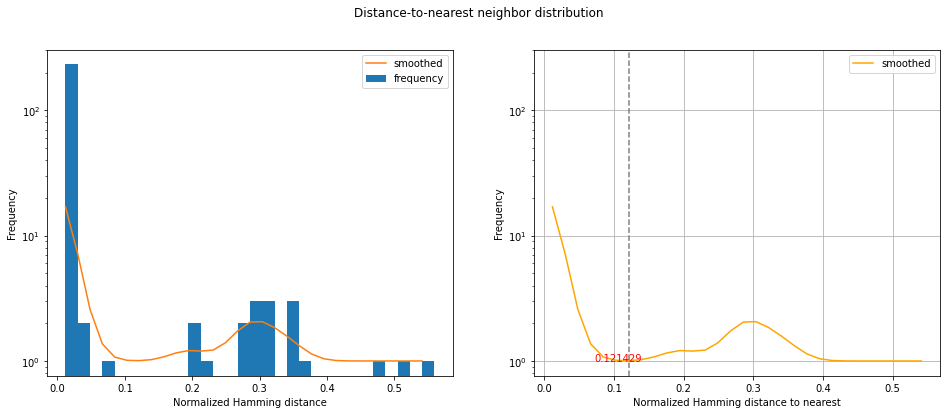

Cutoff value: 0.121429
==== For JUNCTION length 30 ====
153 sequences, 23256 calls, use 0.047539 seconds.
Length of the distance to nearest neighbor list:  153


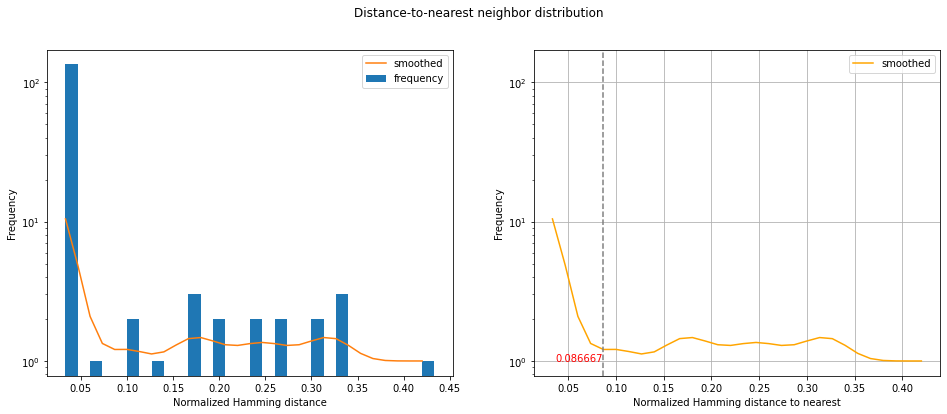

Cutoff value: 0.086667
==== For JUNCTION length 33 ====
145 sequences, 20880 calls, use 0.045775 seconds.
Length of the distance to nearest neighbor list:  145


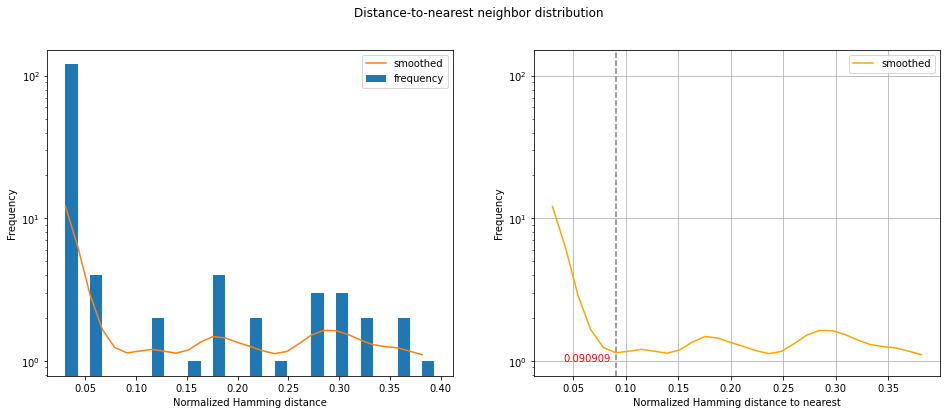

Cutoff value: 0.090909
==== For JUNCTION length 81 ====
143 sequences, 20306 calls, use 0.090233 seconds.
Length of the distance to nearest neighbor list:  143


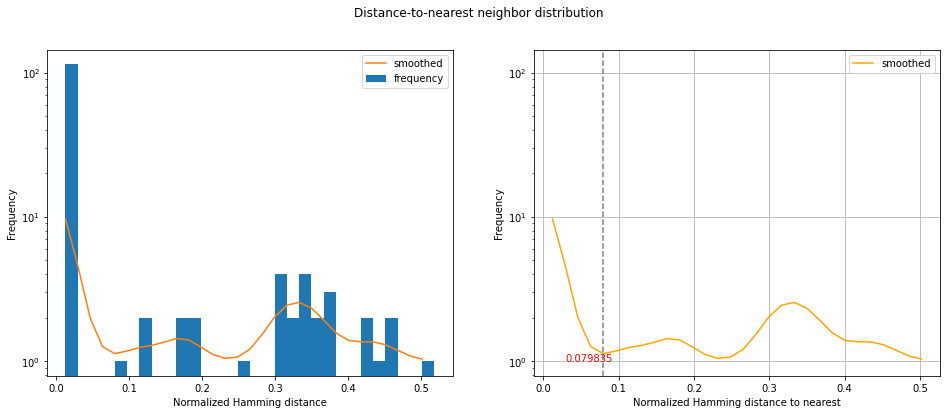

Cutoff value: 0.079835


In [28]:
for l in df_unique["JUNCTION length"].value_counts().index:
    df_len = df_unique[df_unique["JUNCTION length"] == l]
    d,_ = df_len.shape
    if d > 100:
        print("==== For JUNCTION length %d ===="%l)
        d_to_nearest_all,_ = cal_dist_to_nearest_all_exhaustive(df_len)
        print("Length of the distance to nearest neighbor list: ",len(d_to_nearest_all))
        cutoff = outlier_based_cutoff(d_to_nearest_all)
        print("Cutoff value: %f"%cutoff)

==== For JUNCTION length <= 50 ====
For group ['JUNCTION length'] = 18.0: 
3 sequences, 6 calls, use 0.000040 seconds.
For group ['JUNCTION length'] = 21.0: 
5 sequences, 20 calls, use 0.000050 seconds.
For group ['JUNCTION length'] = 24.0: 
66 sequences, 4290 calls, use 0.007872 seconds.
For group ['JUNCTION length'] = 27.0: 
22 sequences, 462 calls, use 0.000959 seconds.
For group ['JUNCTION length'] = 30.0: 
153 sequences, 23256 calls, use 0.048929 seconds.
For group ['JUNCTION length'] = 33.0: 
145 sequences, 20880 calls, use 0.046249 seconds.
For group ['JUNCTION length'] = 36.0: 
523 sequences, 273006 calls, use 0.603526 seconds.
For group ['JUNCTION length'] = 39.0: 
323 sequences, 104006 calls, use 0.259390 seconds.
For group ['JUNCTION length'] = 42.0: 
708 sequences, 500556 calls, use 1.331949 seconds.
For group ['JUNCTION length'] = 45.0: 
1639 sequences, 2684682 calls, use 7.652764 seconds.
For group ['JUNCTION length'] = 48.0: 
969 sequences, 937992 calls, use 2.808658 sec

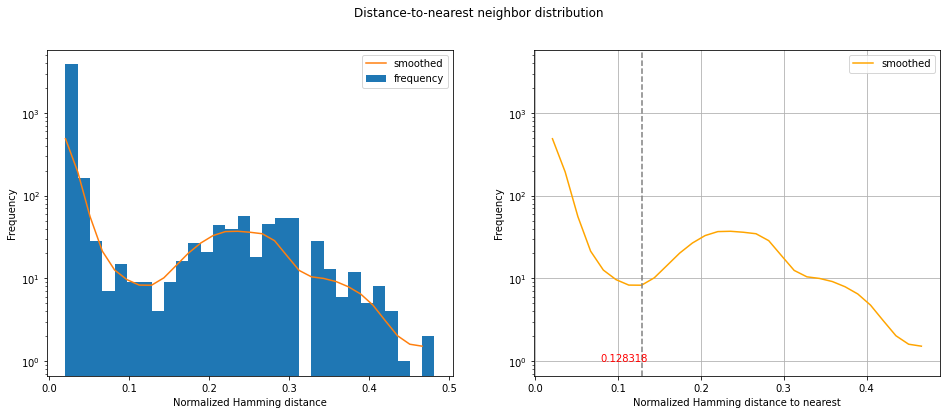

Cutoff value: 0.128318
==== For JUNCTION length > 50 ====
For group ['JUNCTION length'] = 51.0: 
1164 sequences, 1353732 calls, use 4.262583 seconds.
For group ['JUNCTION length'] = 54.0: 
1962 sequences, 3847482 calls, use 12.570457 seconds.
For group ['JUNCTION length'] = 57.0: 
1397 sequences, 1950212 calls, use 6.729480 seconds.
For group ['JUNCTION length'] = 60.0: 
1247 sequences, 1553762 calls, use 5.620751 seconds.
For group ['JUNCTION length'] = 63.0: 
2040 sequences, 4159560 calls, use 15.353253 seconds.
For group ['JUNCTION length'] = 66.0: 
1608 sequences, 2584056 calls, use 10.009525 seconds.
For group ['JUNCTION length'] = 69.0: 
496 sequences, 245520 calls, use 0.980210 seconds.
For group ['JUNCTION length'] = 72.0: 
1238 sequences, 1531406 calls, use 6.295589 seconds.
For group ['JUNCTION length'] = 75.0: 
928 sequences, 860256 calls, use 3.638086 seconds.
For group ['JUNCTION length'] = 78.0: 
587 sequences, 343982 calls, use 1.535430 seconds.
For group ['JUNCTION leng

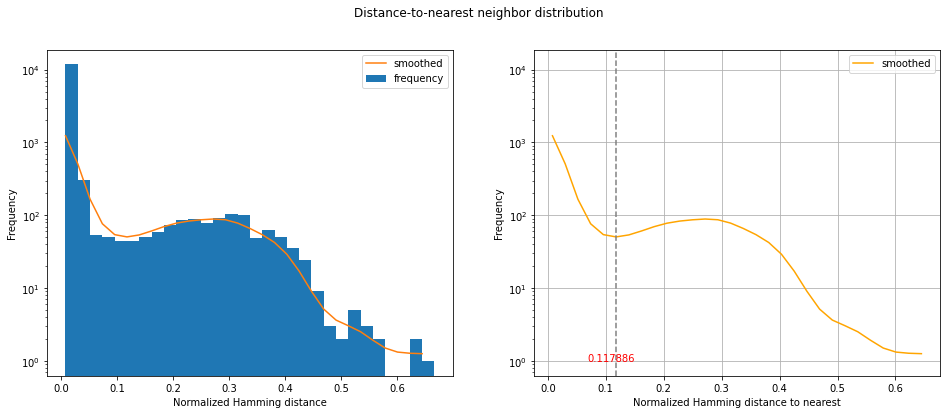

Cutoff value: 0.117886


In [26]:
l = 50
print("==== For JUNCTION length <= %d ===="%l)
df_len = df_unique[df_unique["JUNCTION length"] <= l].reset_index()
d_to_nearest_all,_ = cal_dist_to_nearest_all_exhaustive(df_len,groupby=["JUNCTION length"])
print("Length of the distance to nearest neighbor list: ",len(d_to_nearest_all))
cutoff = outlier_based_cutoff(d_to_nearest_all)
print("Cutoff value: %f"%cutoff)
print("==== For JUNCTION length > %d ===="%l)
df_len = df_unique[df_unique["JUNCTION length"] > l].reset_index()
d_to_nearest_all,_ = cal_dist_to_nearest_all_exhaustive(df_len,groupby=["JUNCTION length"])
print("Length of the distance to nearest neighbor list: ",len(d_to_nearest_all))
cutoff = outlier_based_cutoff(d_to_nearest_all)
print("Cutoff value: %f"%cutoff)

==== For JUNCTION length <= 50 ====
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 48.0): 
3 sequences, 6 calls, use 0.000051 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 39.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 36.0): 
3 sequences, 6 calls, use 0.000030 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 42.0): 
3 sequences, 6 calls, use 0.000032 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 45.0): 
8 sequences, 56 calls, use 0.000176 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 48.0): 
10 sequences, 90 calls, use 0.000276 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 30.0): 
3 sequences, 6 calls, use

295 sequences, 86730 calls, use 0.217366 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 48.0): 
24 sequences, 552 calls, use 0.001582 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ5', 27.0): 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ5', 45.0): 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ5', 48.0): 
8 sequences, 56 calls, use 0.000164 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-70', 'Homsap IGHJ4', 33.0): 
24 sequences, 552 calls, use 0.001114 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-70', 'Homsap IGHJ4', 42.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-70', 'Homsap IGHJ4', 45.0): 
35 sequence

14 sequences, 182 calls, use 0.000524 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ4', 48.0): 
15 sequences, 210 calls, use 0.000626 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ5', 39.0): 
3 sequences, 6 calls, use 0.000030 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 39.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ1', 42.0): 
15 sequences, 210 calls, use 0.000518 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 33.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 36.0): 
3 sequences, 6 calls, use 0.000028 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 42.0): 
3 sequences

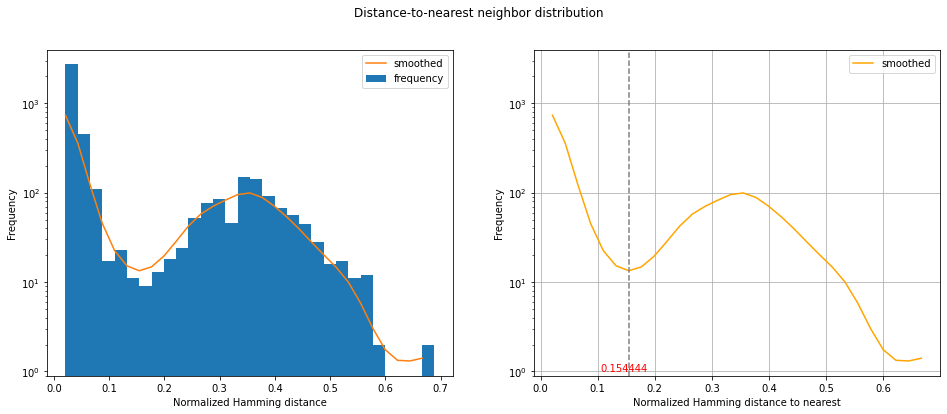

Cutoff value: 0.154444
==== For JUNCTION length > 50 ====
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 51.0): 
6 sequences, 30 calls, use 0.000122 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 66.0): 
45 sequences, 1980 calls, use 0.006474 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 57.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 63.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 75.0): 
9 sequences, 72 calls, use 0.000287 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 51.0): 
163 sequences, 26406 calls, use 0.076884 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 54

935 sequences, 873290 calls, use 3.012629 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 66.0): 
353 sequences, 124256 calls, use 0.424322 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 69.0): 
27 sequences, 702 calls, use 0.002637 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 72.0): 
26 sequences, 650 calls, use 0.002574 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 75.0): 
345 sequences, 118680 calls, use 0.441411 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 78.0): 
12 sequences, 132 calls, use 0.000570 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 81.0): 
16 sequences, 240 calls, use 0.001048 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 84

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 54.0): 
7 sequences, 42 calls, use 0.000155 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 57.0): 
11 sequences, 110 calls, use 0.000368 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 60.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 63.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 66.0): 
2 sequences, 2 calls, use 0.000026 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 69.0): 
4 sequences, 12 calls, use 0.000062 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 72.0): 
486 sequences, 235710 calls, use 0.846188 seconds.
For group ['V-G

143 sequences, 20306 calls, use 0.063951 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 57.0): 
56 sequences, 3080 calls, use 0.010984 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 60.0): 
40 sequences, 1560 calls, use 0.005501 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 63.0): 
14 sequences, 182 calls, use 0.000674 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 66.0): 
19 sequences, 342 calls, use 0.001338 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 69.0): 
39 sequences, 1482 calls, use 0.005523 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 72.0): 
6 sequences, 30 calls, use 0.000138 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 75.

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ5', 54.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ5', 57.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ6', 54.0): 
2 sequences, 2 calls, use 0.000026 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ6', 60.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ6', 63.0): 
6 sequences, 30 calls, use 0.000121 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ6', 66.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-30-4', 'Homsap IGHJ6', 72.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For g

149 sequences, 22052 calls, use 0.065317 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 57.0): 
7 sequences, 42 calls, use 0.000149 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 60.0): 
39 sequences, 1482 calls, use 0.004845 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 63.0): 
7 sequences, 42 calls, use 0.000157 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 66.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 72.0): 
6 sequences, 30 calls, use 0.000123 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 75.0): 
6 sequences, 30 calls, use 0.000122 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ5', 51.0): 
4 sequ

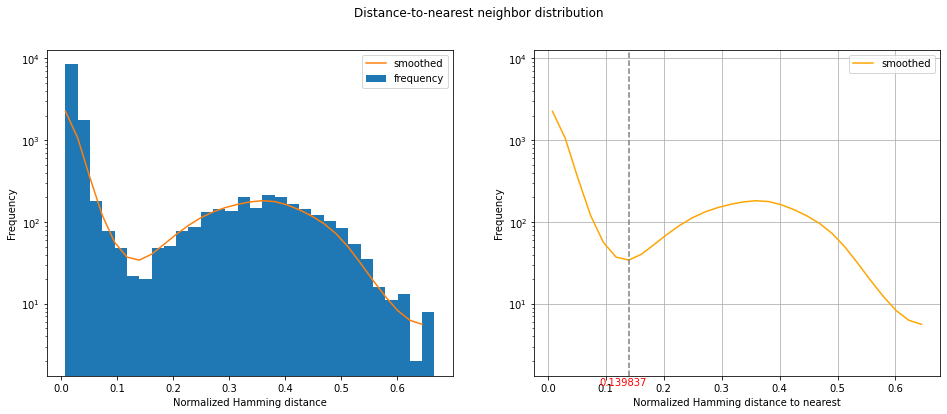

Cutoff value: 0.139837


In [27]:
l = 50
print("==== For JUNCTION length <= %d ===="%l)
df_len = df_unique[df_unique["JUNCTION length"] <= l].reset_index()
d_to_nearest_all,_ = cal_dist_to_nearest_all_exhaustive(df_len,groupby=['V-GENE', 'J-GENE',"JUNCTION length"])
print("Length of the distance to nearest neighbor list: ",len(d_to_nearest_all))
cutoff = outlier_based_cutoff(d_to_nearest_all)
print("Cutoff value: %f"%cutoff)
print("==== For JUNCTION length > %d ===="%l)
df_len = df_unique[df_unique["JUNCTION length"] > l].reset_index()
d_to_nearest_all,_ = cal_dist_to_nearest_all_exhaustive(df_len,groupby=['V-GENE', 'J-GENE',"JUNCTION length"])
print("Length of the distance to nearest neighbor list: ",len(d_to_nearest_all))
cutoff = outlier_based_cutoff(d_to_nearest_all)
print("Cutoff value: %f"%cutoff)

#### 4) negation sequences: look at V/J annotation or not

In [9]:
neg_seq_file = path_data + "Nt_negation_info.csv"
neg_seq = pd.read_csv(neg_seq_file,sep='\t')
df_unique_neg = neg_seq.drop_duplicates(subset="JUNCTION", ignore_index=True)
outfile = path_data+"sample76-99_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
df_unique_sample = df.drop_duplicates(subset="JUNCTION", ignore_index=True)

In [10]:
df_unique = pd.concat([df_unique_sample,df_unique_neg],ignore_index=True)
sample_ind = df_unique_sample.index
neg_ind = df_unique.index.difference(sample_ind)

In [11]:
d_to_nearest_all3,dis3 = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=["JUNCTION length"])

For group ['JUNCTION length'] = 12.0: 
2 sequences, 2 calls, use 0.000034 seconds.
For group ['JUNCTION length'] = 18.0: 
4 sequences, 12 calls, use 0.000035 seconds.
For group ['JUNCTION length'] = 21.0: 
21 sequences, 420 calls, use 0.000720 seconds.
For group ['JUNCTION length'] = 24.0: 
80 sequences, 6320 calls, use 0.011429 seconds.
For group ['JUNCTION length'] = 27.0: 
32 sequences, 992 calls, use 0.001969 seconds.
For group ['JUNCTION length'] = 30.0: 
272 sequences, 73712 calls, use 0.152966 seconds.
For group ['JUNCTION length'] = 33.0: 
219 sequences, 47742 calls, use 0.107595 seconds.
For group ['JUNCTION length'] = 36.0: 
765 sequences, 584460 calls, use 1.367404 seconds.
For group ['JUNCTION length'] = 39.0: 
722 sequences, 520562 calls, use 1.355094 seconds.
For group ['JUNCTION length'] = 42.0: 
1138 sequences, 1293906 calls, use 3.524559 seconds.
For group ['JUNCTION length'] = 45.0: 
2231 sequences, 4975130 calls, use 14.118094 seconds.
For group ['JUNCTION length'] =

In [12]:
d_to_nearest_all4,dis4 = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=['V-GENE', 'J-GENE',"JUNCTION length"])

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 48.0): 
3 sequences, 6 calls, use 0.000048 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 51.0): 
6 sequences, 30 calls, use 0.000110 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 66.0): 
45 sequences, 1980 calls, use 0.006740 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 39.0): 
11 sequences, 110 calls, use 0.000285 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 57.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 63.0): 
3 sequences, 6 calls, use 0.000039 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 75.0): 
9 sequences, 72 calls, use 0.000290 seconds.
For group [

188 sequences, 35156 calls, use 0.119144 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 51.0): 
5 sequences, 20 calls, use 0.000079 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 57.0): 
4 sequences, 12 calls, use 0.000051 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 60.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 63.0): 
8 sequences, 56 calls, use 0.000199 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 75.0): 
4 sequences, 12 calls, use 0.000064 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 30.0): 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 39.0): 
2 sequences, 2 ca

935 sequences, 873290 calls, use 3.066239 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 66.0): 
353 sequences, 124256 calls, use 0.419971 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 69.0): 
27 sequences, 702 calls, use 0.002705 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 72.0): 
26 sequences, 650 calls, use 0.002679 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 75.0): 
345 sequences, 118680 calls, use 0.461419 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 78.0): 
12 sequences, 132 calls, use 0.000597 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 81.0): 
20 sequences, 380 calls, use 0.001754 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 84

82 sequences, 6642 calls, use 0.017200 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 48.0): 
37 sequences, 1332 calls, use 0.003701 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 51.0): 
9 sequences, 72 calls, use 0.000241 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 54.0): 
6 sequences, 30 calls, use 0.000113 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 57.0): 
69 sequences, 4692 calls, use 0.016140 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 66.0): 
31 sequences, 930 calls, use 0.003594 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 72.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-46', 'Homsap IGHJ4', 75.0): 
9 s

129 sequences, 16512 calls, use 0.048554 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 48.0): 
19 sequences, 342 calls, use 0.001072 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 51.0): 
9 sequences, 72 calls, use 0.000248 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 54.0): 
22 sequences, 462 calls, use 0.001545 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 57.0): 
50 sequences, 2450 calls, use 0.008373 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 60.0): 
7 sequences, 42 calls, use 0.000170 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 63.0): 
3 sequences, 6 calls, use 0.000038 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ4', 66.0): 
4 sequenc

273 sequences, 74256 calls, use 0.289988 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ3', 84.0): 
86 sequences, 7310 calls, use 0.030152 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 33.0): 
17 sequences, 272 calls, use 0.000604 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 36.0): 
4 sequences, 12 calls, use 0.000047 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 39.0): 
12 sequences, 132 calls, use 0.000338 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 42.0): 
10 sequences, 90 calls, use 0.000247 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 45.0): 
295 sequences, 86730 calls, use 0.225427 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 48.0): 
24

80 sequences, 6320 calls, use 0.022287 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 63.0): 
10 sequences, 90 calls, use 0.000350 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 66.0): 
32 sequences, 992 calls, use 0.003931 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 69.0): 
10 sequences, 90 calls, use 0.000374 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 72.0): 
3 sequences, 6 calls, use 0.000042 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 75.0): 
5 sequences, 20 calls, use 0.000100 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 81.0): 
6 sequences, 30 calls, use 0.000147 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-11', 'Homsap IGHJ6', 84.0): 
2 seque

143 sequences, 20306 calls, use 0.064968 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 57.0): 
56 sequences, 3080 calls, use 0.010395 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 60.0): 
41 sequences, 1640 calls, use 0.005826 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 63.0): 
14 sequences, 182 calls, use 0.000667 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 66.0): 
19 sequences, 342 calls, use 0.001306 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 69.0): 
39 sequences, 1482 calls, use 0.005391 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 72.0): 
6 sequences, 30 calls, use 0.000137 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ4', 75.

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 57.0): 
29 sequences, 812 calls, use 0.002644 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 60.0): 
23 sequences, 506 calls, use 0.001735 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 63.0): 
44 sequences, 1892 calls, use 0.006950 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 66.0): 
27 sequences, 702 calls, use 0.002619 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 69.0): 
49 sequences, 2352 calls, use 0.009159 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 72.0): 
30 sequences, 870 calls, use 0.003509 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30', 'Homsap IGHJ6', 75.0): 
33 sequences, 1056 calls, use 0.004417 secon

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ4', 57.0): 
5 sequences, 20 calls, use 0.000089 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ4', 60.0): 
6 sequences, 30 calls, use 0.000121 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ4', 66.0): 
4 sequences, 12 calls, use 0.000061 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ5', 42.0): 
3 sequences, 6 calls, use 0.000032 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ5', 48.0): 
20 sequences, 380 calls, use 0.001042 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ5', 51.0): 
3 sequences, 6 calls, use 0.000034 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-66', 'Homsap IGHJ5', 60.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-

61 sequences, 3660 calls, use 0.010614 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 51.0): 
3 sequences, 6 calls, use 0.000032 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 54.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 57.0): 
6 sequences, 30 calls, use 0.000116 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 60.0): 
11 sequences, 110 calls, use 0.000449 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 63.0): 
8 sequences, 56 calls, use 0.000213 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 66.0): 
3 sequences, 6 calls, use 0.000038 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-31', 'Homsap IGHJ6', 72.0): 
4 sequences

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 33.0): 
2 sequences, 2 calls, use 0.000019 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 36.0): 
17 sequences, 272 calls, use 0.000592 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 39.0): 
11 sequences, 110 calls, use 0.000277 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 42.0): 
2 sequences, 2 calls, use 0.000019 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 48.0): 
22 sequences, 462 calls, use 0.001254 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 51.0): 
4 sequences, 12 calls, use 0.000052 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-59', 'Homsap IGHJ3', 54.0): 
4 sequences, 12 calls, use 0.000053 seconds.
For group

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ3', 51.0): 
10 sequences, 90 calls, use 0.000259 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ3', 54.0): 
6 sequences, 30 calls, use 0.000105 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ3', 57.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ3', 60.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 24.0): 
3 sequences, 6 calls, use 0.000027 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 39.0): 
18 sequences, 306 calls, use 0.000738 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 42.0): 
9 sequences, 72 calls, use 0.000204 seconds.
For group ['V

In [13]:
# for negation sequence: get the d to nearest all distribution
dis_neg3 = dis3[sample_ind,:][:,neg_ind]
dis_neg3.shape

(17793, 5090)

In [14]:
d_to_nearest_all_neg3 = dist_to_nearest(dis_neg3)
d_to_nearest_all_neg3.shape

(5090,)

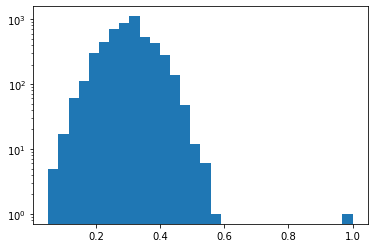

In [16]:
plt.hist(d_to_nearest_all_neg3,bins=30)
plt.yscale("log")

In [17]:
# for negation sequence: get the d to nearest all distribution
dis_neg4 = dis4[sample_ind,:][:,neg_ind]
d_to_nearest_all_neg4 = dist_to_nearest(dis_neg4)

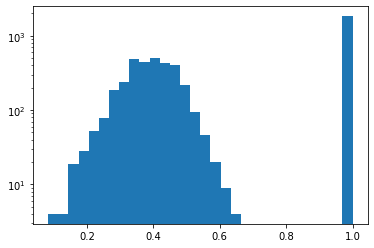

In [18]:
plt.hist(d_to_nearest_all_neg4,bins=30)
plt.yscale("log")

In [19]:
tolerance = 0.05

In [20]:
negation_based_cutoff(d_to_nearest_all_neg3, tolerance)

0.1875

In [21]:
negation_based_cutoff(d_to_nearest_all_neg4, tolerance)

0.27450980392156865

### 2. alignment-free

#### 1) without negation sequence

In [29]:
k=3

In [30]:
outfile = path_data+"sample76-99_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
print("Unique junction sequence:",df_unique.shape)

Unique junction sequence: (17793, 7)


In [36]:
%%time
seqs_tf_idf = cal_tf_idf(df_unique.loc[:,"V-D-J-REGION"].values,k=k,atoms=["a","t","c","g"])

CPU times: user 3.21 s, sys: 24 ms, total: 3.23 s
Wall time: 3.22 s


In [33]:
%%time
d_to_nearest_all5,dis5 = dist_to_nearest_all_exhaustive(seqs_tf_idf, distance=Cosine_dist)

17793 sequences, 316573056 calls, use 2966.115353 seconds.
CPU times: user 49min 23s, sys: 377 ms, total: 49min 23s
Wall time: 49min 26s


In [35]:
np.save(path_data+"d_to_nearest_sample76-99_a-free.npy", d_to_nearest_all5)
np.save(path_data+"dis_sample76-99_a-free.npy", dis5)

In [ ]:
d_to_nearest_all5 = np.load(path_data+"d_to_nearest_sample76-99_a-free.npy")
dis5 = np.load(path_data+"dis_sample76-99_a-free.npy")

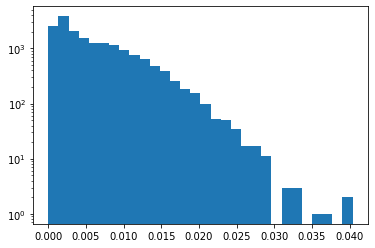

In [34]:
plt.hist(d_to_nearest_all5,bins=30)
plt.yscale("log")

#### 2) with negation sequence

In [37]:
neg_seq_file = path_data + "Nt_negation_info.csv"
neg_seq = pd.read_csv(neg_seq_file,sep='\t')
neg_tf_idf = cal_tf_idf(neg_seq.loc[:,"V-D-J-REGION"].values,k=k,atoms=["a","t","c","g"])

In [38]:
all_seqs_tf_idf = neg_tf_idf + seqs_tf_idf

In [39]:
%%time
d_to_nearest_all6,dis6 = dist_to_nearest_all_exhaustive(all_seqs_tf_idf, distance=Cosine_dist)

32121 sequences, 1031726520 calls, use 10136.611130 seconds.
CPU times: user 2h 48min 40s, sys: 3.41 s, total: 2h 48min 44s
Wall time: 2h 48min 56s


In [40]:
np.save(path_data+"d_to_nearest_sample76-99_negation_a-free.npy", d_to_nearest_all6)
np.save(path_data+"dis_sample76-99_negation_a-free.npy", dis6)

In [ ]:
d_to_nearest_all6 = np.load(path_data+"d_to_nearest_sample76-99_negation_a-free.npy")
dis6 = np.load(path_data+"dis_sample76-99_negation_a-free.npy")

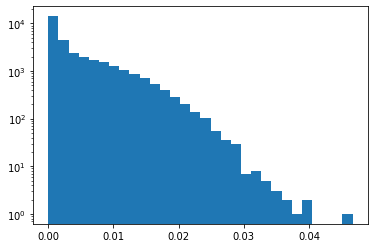

In [41]:
plt.hist(d_to_nearest_all6,bins=30)
plt.yscale("log")

#### 3) d of negation sequence

In [42]:
d_to_nearest_all7,dis7 = dist_to_nearest_all_exhaustive(seqs_tf_idf, neg_tf_idf, distance=Cosine_dist)

17793 sequences, 254923776 calls, use 2613.675857 seconds.


In [43]:
np.save(path_data+"d_to_nearest_negation_a-free.npy", d_to_nearest_all7)
np.save(path_data+"dis_negation_a-free.npy", dis7)

In [44]:
negation_based_cutoff(d_to_nearest_all7, tolerance)

0.020976112440967393

## Detect the cut-off using negation table

In [8]:
neg_seq_file = path_data + "Nt_negation_info.csv"
neg_seq = pd.read_csv(neg_seq_file,sep='\t')
df_unique_neg = neg_seq.drop_duplicates(subset="JUNCTION", ignore_index=True)
df_unique_neg

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
0,18620,18619,Homsap IGHV1-24,Homsap IGHJ5,gggctgaggtgaagaagcctggggcctcagtgaaggtctcctgcaa...,tgcgacccctgg,12
1,60,59,Homsap IGHV3-23D,Homsap IGHJ5,ggaggcttggtacagcctggggagtccctgagactctcctgtgcag...,tgtgcgagcggccacttg,18
2,86,85,Homsap IGHV7-4-1,Homsap IGHJ5,ggtctgagttgaagaagcctggggcctcagtgaaggtttcctgcac...,tgtctgagcgactacaattgg,21
3,134,133,Homsap IGHV7-4-1,Homsap IGHJ4,gtctgagttgaagaagcctggggcctcagtgaaggtttcctgcacg...,tgtctgagcgaatacaattgg,21
4,136,135,Homsap IGHV7-4-1,Homsap IGHJ4,ggtctgagttgaagaagcctggggcctcagtgaaggtttcctgcaa...,tgtgcgagaatggactactgg,21
...,...,...,...,...,...,...,...
5085,11952,11951,Homsap IGHV3-74,Homsap IGHJ6,gggaggcttagttcagccgggggggtccctgagactctcctgtgca...,tgtgtaagagtctccggccgaggccatacttacgatattttgactg...,84
5086,11947,11946,Homsap IGHV3-74,Homsap IGHJ6,gggaggcttagttcagcctggggggtccctgagactctcctgtgca...,tgtgcaagagtctccggccgaggccaaacttacgatattttgactg...,84
5087,6314,6313,Homsap IGHV1-8,Homsap IGHJ6,ggctgaggtgaagaagcctggggcctcagtgagggtctcctgcaag...,tgtgcgagagggctctctgatccggcccgggatagtgaagtggttc...,87
5088,11526,11525,Homsap IGHV3-30,Homsap IGHJ3,ggggaggcgtggtccagcctgggaggtccctcagactctcctgtgc...,tgtgcgaaggggattcggaggcattacagtgtttggagcgcttata...,90


In [9]:
outfile = path_data+"sample90_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
df_unique_sample = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
df_unique_sample

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
0,69510,M06023:233:000000000-JCVJP:1:1103:22934:15540_...,Homsap IGHV1-2,Homsap IGHJ4,gcttccggatacaccctcagtgaattatccatgcactgggtgcgac...,tgtgcgagagcctcagactactgg,24.0
1,28507,M06023:233:000000000-JCVJP:1:2105:13844:10325_...,Homsap IGHV1-2,Homsap IGHJ4,gcttctggatacaccttcaccgactactctatgcactgggtgcgac...,tgtgctagagcctcagactactgg,24.0
2,37141,M06023:233:000000000-JCVJP:1:1119:4237:11394_1...,Homsap IGHV1-46,Homsap IGHJ4,gcatctggatacatcttcaccagctactttatgcactgggtgcgac...,tgtgcgatagcctcagactactgg,24.0
3,73998,M06023:233:000000000-JCVJP:1:1117:24841:17489_...,Homsap IGHV1-69D,Homsap IGHJ4,gcatctggatacatcttcaccagctactgtatccactgggtgcgac...,tgtgcgagtgcctcagactactgg,24.0
4,32339,M06023:233:000000000-JCVJP:1:2102:11722:22599_...,Homsap IGHV1-2,Homsap IGHJ4,gcttctggatacaccttcaccgactactatatgcactgggtgcgac...,tgtgcgagagcctcagactcctgg,24.0
...,...,...,...,...,...,...,...
618,48478,M06023:233:000000000-JCVJP:1:1113:8298:13046_1...,Homsap IGHV1-2,Homsap IGHJ4,gcttctggatacaccttcaccgactactatatgcactgggtgcgac...,tgtgcgagagacacgaccttcgacgtattacgatttttggagtggc...,84.0
619,13178,M06023:233:000000000-JCVJP:1:2111:13627:7341_1...,Homsap IGHV3-30,Homsap IGHJ4,tgcagcctctggattcaccttcagtagctatgctatgtactgggtc...,tgtgcgagagacacgaccttcgacgtattacgatttttggagttgc...,84.0
620,47150,M06023:233:000000000-JCVJP:1:1114:4432:21414_1...,Homsap IGHV3-30-3,Homsap IGHJ4,tgcagcctctggattcaccttcagtagctatgctatgcactgggtc...,tgtgcgagagacacgaccttcgacgtattacgatttttggagttgc...,84.0
621,32142,M06023:233:000000000-JCVJP:1:2116:15176:5277_1...,Homsap IGHV3-23,Homsap IGHJ4,gcagcgtctggattcaccttcagtagctatggcatgcactgggtcc...,tatgcgagagacacgaccttcgacgtattacgatttttggagtggc...,84.0


In [14]:
df_unique = pd.concat([df_unique_sample,df_unique_neg],ignore_index=True)
sample_ind = df_unique_sample.index
neg_ind = df_unique.index.difference(sample_ind)
neg_ind

RangeIndex(start=623, stop=5713, step=1)

In [12]:
d_to_nearest_all,dis = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=["JUNCTION length"])

For group ['JUNCTION length'] = 21.0: 
16 sequences, 240 calls, use 0.000424 seconds.
For group ['JUNCTION length'] = 24.0: 
28 sequences, 756 calls, use 0.001355 seconds.
For group ['JUNCTION length'] = 27.0: 
10 sequences, 90 calls, use 0.000193 seconds.
For group ['JUNCTION length'] = 30.0: 
121 sequences, 14520 calls, use 0.029923 seconds.
For group ['JUNCTION length'] = 33.0: 
76 sequences, 5700 calls, use 0.012815 seconds.
For group ['JUNCTION length'] = 36.0: 
243 sequences, 58806 calls, use 0.140743 seconds.
For group ['JUNCTION length'] = 39.0: 
406 sequences, 164430 calls, use 0.415007 seconds.
For group ['JUNCTION length'] = 42.0: 
445 sequences, 197580 calls, use 0.523542 seconds.
For group ['JUNCTION length'] = 45.0: 
656 sequences, 429680 calls, use 1.191774 seconds.
For group ['JUNCTION length'] = 48.0: 
547 sequences, 298662 calls, use 0.895174 seconds.
For group ['JUNCTION length'] = 51.0: 
601 sequences, 360600 calls, use 1.107455 seconds.
For group ['JUNCTION length'

In [29]:
# for negation sequence: get the d to nearest all distribution
dis_neg = dis[sample_ind,:][:,neg_ind]
dis_neg.shape

(623, 5090)

In [30]:
d_to_nearest_all_neg = dist_to_nearest(dis_neg)
d_to_nearest_all_neg.shape

(5090,)

(array([   8.,  100.,  734., 1999., 1615.,  490.,   63.,    3.,    0.,
          78.]),
 array([0.07575758, 0.16818182, 0.26060606, 0.3530303 , 0.44545455,
        0.53787879, 0.63030303, 0.72272727, 0.81515152, 0.90757576,
        1.        ]),
 <BarContainer object of 10 artists>)

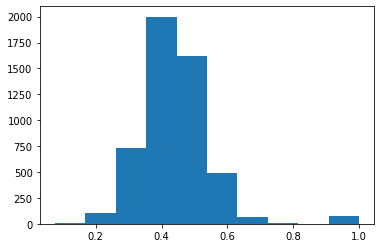

In [31]:
plt.hist(d_to_nearest_all_neg)

In [34]:
tolerance = 0.05

In [35]:
cutoff = negation_based_cutoff(d_to_nearest_all_neg, tolerance)
cutoff

0.2916666666666667

**Conclusion: the distribution of the distance to the nearest corresponding sequence of negation sequences locates differently with the singleton distribution. Try more samples.**

In [36]:
outfile = path_data+"sample76-99_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
df_unique_sample = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
df_unique_sample

,Sequence number,Sequence ID,V-GENE,J-GENE,V-D-J-REGION,JUNCTION,JUNCTION length
0,41539,M70528:211:000000000-JBWLT:1:2105:7062:19238_1...,Homsap IGHV3-74,Homsap IGHJ5,tgcagcctctggattcacctttagcagctatgccatgagctgggtc...,tgtgcaaaagacgccaactgg,21.0
1,4109,M70528:211:000000000-JBWLT:1:1101:10084:6428_1...,Homsap IGHV1-2,Homsap IGHJ4,acttctggatacaccttcaccgaatactatatacattgggtgcgac...,tgtgcgagcggtggccctgaccactgg,27.0
2,124357,M70528:211:000000000-JBWLT:1:2119:13587:21742_...,Homsap IGHV4-34,Homsap IGHJ4,cgctgtctatggtgggtccttcagtggttactactggagctggatc...,tgtgcgaaagagtactcctttgactactgg,30.0
3,7679,M70528:211:000000000-JBWLT:1:2115:4529:11589_1...,Homsap IGHV3-30,Homsap IGHJ4,tgcagcctctggattcaccttcagtagctatgctatgcactgggtc...,tgtgcgggtctcgtccgatttgactactgg,30.0
4,105089,M70528:211:000000000-JBWLT:1:1105:21528:10785_...,Homsap IGHV3-23,Homsap IGHJ4,tgcagcctctggattcacctttagcagccatgccatgagttgggtc...,tgtgcgagagagtactcctttgactactgg,30.0
...,...,...,...,...,...,...,...
17788,75297,M06023:233:000000000-JCVJP:1:1117:15940:6784_1...,Homsap IGHV1-2,Homsap IGHJ5,gcttctggatacaccttcaccggctactatatgcactgggtgcgac...,tgtgcgagagatgccctctcgtattgtagtggtggtagctgctacg...,96.0
17789,63702,M06023:233:000000000-JCVJP:1:1108:15788:7312_1...,Homsap IGHV1-18,Homsap IGHJ5,gcttctggttacaccttttccagctatggtgtctgctgggtgcgac...,tgtgcgagagatgccctctcgtattgtagtggtggtagctgctacg...,96.0
17790,22125,M06023:233:000000000-JCVJP:1:2106:21831:8225_1...,Homsap IGHV1-8,Homsap IGHJ6,gcttctggatacaccttcaccagttatgatatcaactgggtgcgac...,tgtgcgagatggcgggtcccccgtattgtagtagtaccagctgctc...,99.0
17791,29526,M06023:233:000000000-JCVJP:1:2105:12015:10867_...,Homsap IGHV1-8,Homsap IGHJ6,gcttctggatacaccttcaccagttatgatatcaactgggtgcgac...,tntgcgagatggcgggtcccccgtattgtagtagtaccagctgctc...,99.0


In [37]:
df_unique_all = pd.concat([df_unique_sample,df_unique_neg],ignore_index=True)
sample_ind = df_unique_sample.index
neg_ind = df_unique_all.index.difference(sample_ind)
neg_ind

RangeIndex(start=17793, stop=22883, step=1)

In [38]:
d_to_nearest_all,dis = cal_dist_to_nearest_all_exhaustive(df_unique_all,groupby=["JUNCTION length"])

For group ['JUNCTION length'] = 12.0: 
2 sequences, 2 calls, use 0.000036 seconds.
For group ['JUNCTION length'] = 18.0: 
4 sequences, 12 calls, use 0.000034 seconds.
For group ['JUNCTION length'] = 21.0: 
21 sequences, 420 calls, use 0.000706 seconds.
For group ['JUNCTION length'] = 24.0: 
80 sequences, 6320 calls, use 0.011090 seconds.
For group ['JUNCTION length'] = 27.0: 
32 sequences, 992 calls, use 0.001948 seconds.
For group ['JUNCTION length'] = 30.0: 
272 sequences, 73712 calls, use 0.151250 seconds.
For group ['JUNCTION length'] = 33.0: 
219 sequences, 47742 calls, use 0.107991 seconds.
For group ['JUNCTION length'] = 36.0: 
765 sequences, 584460 calls, use 1.388242 seconds.
For group ['JUNCTION length'] = 39.0: 
722 sequences, 520562 calls, use 1.335238 seconds.
For group ['JUNCTION length'] = 42.0: 
1138 sequences, 1293906 calls, use 3.528724 seconds.
For group ['JUNCTION length'] = 45.0: 
2231 sequences, 4975130 calls, use 14.341296 seconds.
For group ['JUNCTION length'] =

In [39]:
# for negation sequence: get the d to nearest all distribution
dis_neg = dis[sample_ind,:][:,neg_ind]
dis_neg.shape

(17793, 5090)

In [40]:
d_to_nearest_all_neg = dist_to_nearest(dis_neg)
d_to_nearest_all_neg.shape

(5090,)

(array([5.000e+00, 1.700e+01, 6.000e+01, 1.120e+02, 3.060e+02, 4.450e+02,
        7.010e+02, 8.820e+02, 1.109e+03, 5.390e+02, 4.260e+02, 2.830e+02,
        1.380e+02, 4.700e+01, 1.200e+01, 6.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.05128205, 0.08290598, 0.11452991, 0.14615385, 0.17777778,
        0.20940171, 0.24102564, 0.27264957, 0.3042735 , 0.33589744,
        0.36752137, 0.3991453 , 0.43076923, 0.46239316, 0.49401709,
        0.52564103, 0.55726496, 0.58888889, 0.62051282, 0.65213675,
        0.68376068, 0.71538462, 0.74700855, 0.77863248, 0.81025641,
        0.84188034, 0.87350427, 0.90512821, 0.93675214, 0.96837607,
        1.        ]),
 <BarContainer object of 30 artists>)

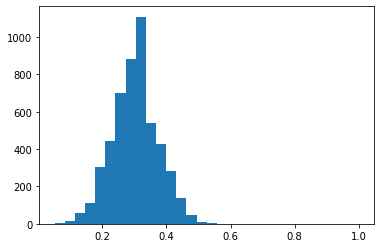

In [44]:
plt.hist(d_to_nearest_all_neg,bins=30)

In [42]:
tolerance = 0.05

In [43]:
cutoff = negation_based_cutoff(d_to_nearest_all_neg, tolerance)
cutoff

0.1875

## Clustering sample 90

In [4]:
%%time
outfile = path_data+"sample90_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
print("All sequence:",df.shape)
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
print("Unique junction sequence:",df_unique.shape)
d_to_nearest_all,dis = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=["JUNCTION length"])

All sequence: (19195, 7)
Unique junction sequence: (623, 7)
For group ['JUNCTION length'] = 24.0: 
14 sequences, 91 calls, use 0.000549 seconds.
For group ['JUNCTION length'] = 30.0: 
2 sequences, 1 calls, use 0.000154 seconds.
For group ['JUNCTION length'] = 33.0: 
2 sequences, 1 calls, use 0.000133 seconds.
For group ['JUNCTION length'] = 39.0: 
7 sequences, 21 calls, use 0.000233 seconds.
For group ['JUNCTION length'] = 42.0: 
15 sequences, 105 calls, use 0.000647 seconds.
For group ['JUNCTION length'] = 45.0: 
64 sequences, 2016 calls, use 0.013498 seconds.
For group ['JUNCTION length'] = 48.0: 
61 sequences, 1830 calls, use 0.013040 seconds.
For group ['JUNCTION length'] = 51.0: 
16 sequences, 120 calls, use 0.001751 seconds.
For group ['JUNCTION length'] = 54.0: 
250 sequences, 31125 calls, use 0.303820 seconds.
For group ['JUNCTION length'] = 57.0: 
6 sequences, 15 calls, use 0.002891 seconds.
For group ['JUNCTION length'] = 60.0: 
63 sequences, 1953 calls, use 0.018399 seconds.

In [ ]:
np.save(path_data+"d_to_nearest_sample90_a-based.npy", d_to_nearest_all)
np.save(path_data+"dis_sample90_a-based.npy", dis)

Automatic pdb calling has been turned ON


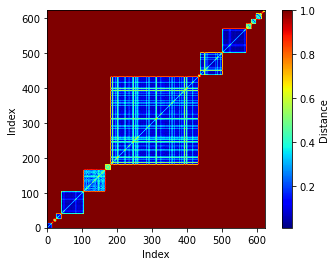



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = 0.117886 there is 71 clusters


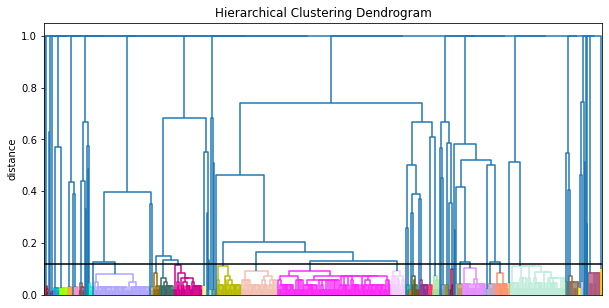

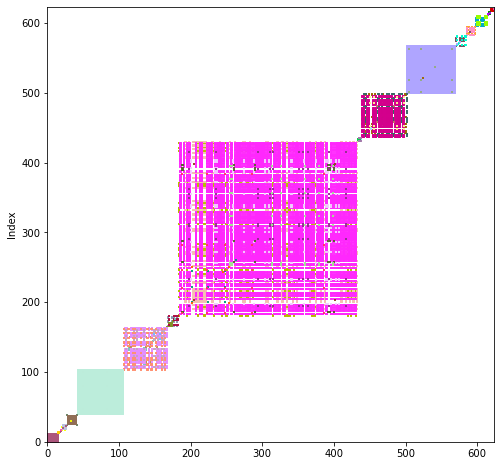

array([68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 66,
       67, 70, 62, 63, 64, 63, 62, 65, 63, 59, 60, 60, 60, 60, 61, 60, 60,
       60, 60, 60, 60, 60, 60, 59, 58, 58, 58, 58, 58, 58, 58, 57, 58, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 58, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
       57, 58, 58, 56, 56, 53, 55, 53, 53, 56, 51, 56, 52, 53, 52, 53, 56,
       55, 53, 56, 53, 53, 55, 53, 53, 53, 53, 56, 53, 53, 53, 51, 55, 53,
       51, 52, 56, 56, 53, 53, 52, 56, 56, 53, 49, 55, 54, 55, 56, 53, 52,
       55, 53, 53, 54, 53, 56, 55, 50, 53, 55, 56, 53, 53, 45, 43, 46, 47,
       46, 46, 46, 43, 44, 43, 47, 48, 47, 43, 43, 47, 30, 30, 32, 32, 41,
       38, 38, 32, 32, 31, 31, 32, 30, 32, 40, 31, 32, 33, 37, 35, 31, 31,
       39, 31, 32, 31, 31, 30, 31, 32, 32, 31, 32, 32, 31, 30, 30, 31, 31,
       32, 41, 35, 32, 32

In [5]:
%pdb
d_threshold = loc_min = 0.117886
cluster_HAC(dis, d_threshold)

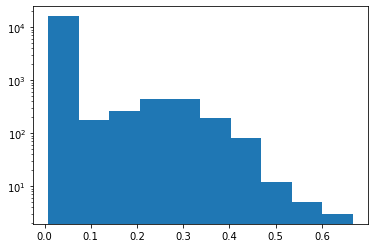

In [5]:
plt.hist(d_to_nearest_all)
plt.yscale("log")

In [7]:
np.min(d_to_nearest_all)

0.008130081300813009